# Constructing and Solving Differential Equations in Python Using sympy

## Introduction

In this tutorial, we will learn how to construct and numerically solve ordinary differential equations (ODEs) using Python's `SymPy` library to symbolically define equations and `SciPy`'s `solve_ivp` function for numerical simulation. Additionally, we'll visualize the results using `matplotlib`.

### Key Libraries:
- **`SymPy`**: A Python library for symbolic mathematics. We will use it to construct and manipulate differential equations symbolically.
- **`SciPy`**: A scientific computing library. The `solve_ivp` function from `scipy.integrate` will be used for numerically solving ODEs.
- **`Matplotlib`**: A plotting library to visualize the simulation results.
- **`Numpy`**: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Let us install them (the package wheel is just a utility that makes it less likely you get build errors when installing the other packages. It is optional but recommended):

In [5]:
%pip install wheel
%pip install sympy
%pip install scipy
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



**Note:** If you get import errors below, just restart the kernel, as you may need to restart the kernel to use updated packages.

## Step 1: Defining Differential Equations Symbolically with `SymPy`

We can use `SymPy` to symbolically represent and manipulate differential equations. Let's define a simple first-order ODE:  
$$
\frac{dy}{dt} = -ky
$$
This equation models exponential decay, where `y(t)` is a function of time `t`, and `k` is a constant.

In [6]:
import sympy as sp

# Define the variables and functions
t = sp.symbols('t')  # Time variable
y = sp.Function('y')(t)  # Dependent variable y(t)
k = sp.symbols('k')  # Constant k

# Define the differential equation
ode = sp.Eq(y.diff(t), -k * y)

# Display the equation
ode

Eq(Derivative(y(t), t), -k*y(t))

## Step 2: Solving the ODE Symbolically

We can solve the differential equation symbolically using `SymPy`'s `dsolve` function. This will give us the general solution of the ODE.

In [7]:
# Solve the ODE symbolically
solution = sp.dsolve(ode)
solution

Eq(y(t), C1*exp(-k*t))

where $ C_1 $ is an integration constant.

## Step 3: Numerical Simulation with `SciPy`

Next, we'll solve the same ODE numerically using `SciPy`. We'll define the right-hand side of the differential equation as a Python function and use `solve_ivp` to numerically integrate it.

We need to define:
- The ODE as a Python function.
- The initial conditions.
- The time range for the simulation.

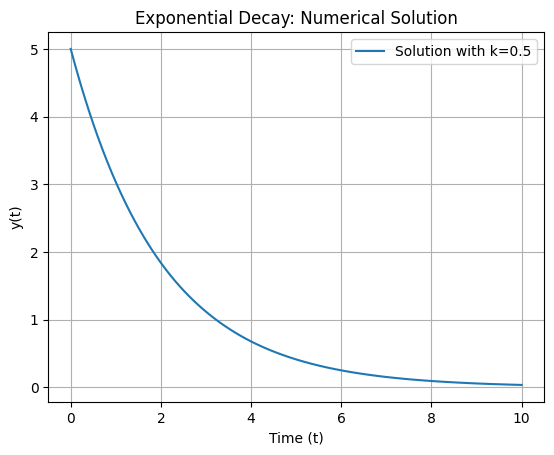

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE as a Python function
def ode_system(t, y, k):
    return [-k * y[0]]

# Parameters
k = 0.5  # Decay constant
y0 = [5.0]  # Initial condition y(0) = 5
t_span = (0, 10)  # Time range for the simulation
t_eval = np.linspace(0, 10, 100)  # Time points where we want the solution

# Solve the ODE numerically
solution = solve_ivp(ode_system, t_span, y0, args=(k,), t_eval=t_eval)

# Extract the time and solution values
t_values = solution.t
y_values = solution.y[0]

# Plot the solution
plt.figure()
plt.plot(t_values, y_values, label=f'Solution with k={k}')
plt.title('Exponential Decay: Numerical Solution')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

### Explanation:

1. **`ode_system(t, y, k)`**: This defines the ODE system for `solve_ivp`. The function takes time `t`, the dependent variable `y`, and the parameter `k`. It returns the rate of change of `y` at any given time `t`.
   
2. **Parameters**:
   - `k = 0.5`: This is the decay constant.
   - `y0 = [5.0]`: The initial condition for `y(t)` at `t = 0` (i.e., $ y(0) = 5 $).
   - `t_span = (0, 10)`: The time range over which we want to simulate the system.
   - `t_eval = np.linspace(0, 10, 100)`: Time points where we want the solver to evaluate the solution.

3. **`solve_ivp`**: This function numerically solves the ODE over the specified time range and returns the solution at the requested time points.

4. **Plotting**: We use `matplotlib` to plot the solution of the ODE, showing how `y(t)` evolves over time.


## Step 4: Solving a System of ODEs

Now, let's extend this example to a system of ODEs. Consider the predator-prey (Lotka-Volterra) model:
$$
\frac{dx}{dt} = \alpha x - \beta xy
$$
$$
\frac{dy}{dt} = \delta xy - \gamma y
$$
where:
- $ x $ represents the prey population,
- $ y $ represents the predator population,
- $ \alpha, \beta, \gamma, \delta $ are constants.



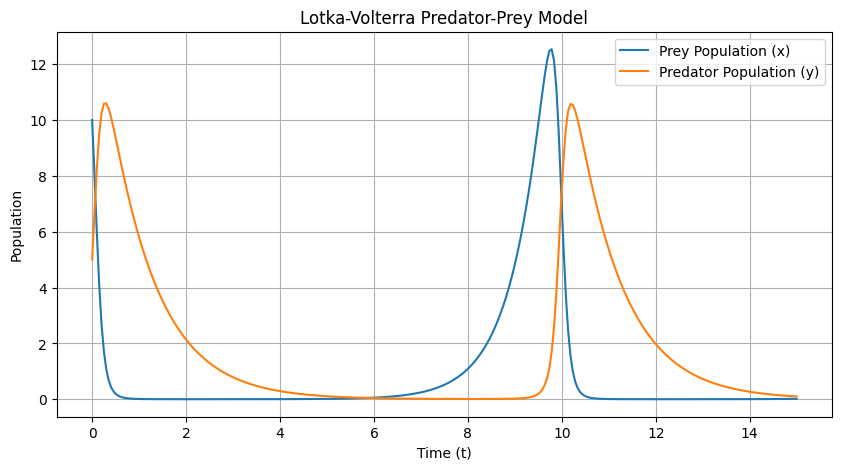

In [9]:
# Define the Lotka-Volterra system as a Python function
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Parameters
alpha = 1.5  # Prey birth rate
beta = 1.0   # Predation rate
delta = 0.75 # Predator reproduction rate
gamma = 1.0  # Predator death rate

# Initial conditions: [prey population, predator population]
z0 = [10, 5]

# Time span for the simulation
t_span = (0, 15)
t_eval = np.linspace(0, 15, 300)

# Solve the system of ODEs numerically
solution = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, delta, gamma), t_eval=t_eval)

# Extract the results
t_values = solution.t
prey_values = solution.y[0]
predator_values = solution.y[1]

# Plot the solution
plt.figure(figsize=(10, 5))
plt.plot(t_values, prey_values, label='Prey Population (x)')
plt.plot(t_values, predator_values, label='Predator Population (y)')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.grid(True)
plt.legend()
plt.show()

### Explanation:

1. **`lotka_volterra(t, z, alpha, beta, delta, gamma)`**:
   - This function defines the Lotka-Volterra system of ODEs.
   - `z = [x, y]` where `x` is the prey population and `y` is the predator population.
   - The function returns the rates of change `dx/dt` and `dy/dt`.

2. **Parameters**:
   - `alpha`, `beta`, `delta`, and `gamma` are the model parameters that define the interaction rates between the predator and prey populations.

3. **`solve_ivp`**: This function solves the system of ODEs, and the results are stored in `solution`.

4. **Plotting**: We plot both the prey and predator populations over time, showing how their populations fluctuate.


## Step 5: Solving an ODE with a Continuous Time-Varying Input

In this case, we'll solve an ODE where the input changes continuously over time. Let's modify the ODE:

$$
\frac{dy}{dt} = -ky + u(t)
$$

Where:
- $y(t)$ is the dependent variable,
- $k$ is a constant,
- $u(t)$ is a time-varying input that changes continuously.

For example, we can define $u(t)$ as a sinusoidal function:  
$$
u(t) = \sin(t)
$$


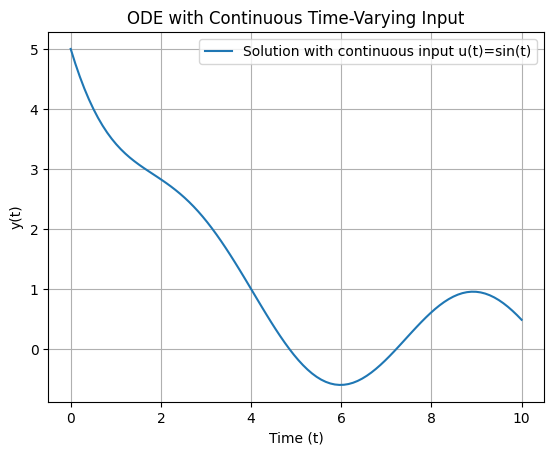

In [10]:
# Define the ODE with a continuous time-varying input u(t)
def ode_with_continuous_input(t, y, k):
    u_t = np.sin(t)  # Define u(t) as sin(t)
    dydt = -k * y[0] + u_t  # ODE: dy/dt = -ky + u(t)
    return [dydt]

# Parameters
k = 0.5  # Decay constant
y0 = [5.0]  # Initial condition y(0) = 5
t_span = (0, 10)  # Time range for the simulation
t_eval = np.linspace(0, 10, 100)  # Time points where we want the solution

# Solve the ODE numerically
solution = solve_ivp(ode_with_continuous_input, t_span, y0, args=(k,), t_eval=t_eval)

# Extract the time and solution values
t_values = solution.t
y_values = solution.y[0]

# Plot the solution
plt.figure()
plt.plot(t_values, y_values, label=f'Solution with continuous input u(t)=sin(t)')
plt.title('ODE with Continuous Time-Varying Input')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

#### Explanation:

1. **`ode_with_continuous_input`**:
   - Defines the ODE system with a continuous input `u(t) = sin(t)` that changes over time.
   - The function returns the rate of change of `y` at any given time `t` based on the current value of `y` and the input `u(t)`.

2. **Parameters**:
   - The decay constant `k = 0.5`.
   - The initial condition `y0 = [5.0]`.

3. **Plotting**:
   - The solution is plotted, showing how `y(t)` evolves under the influence of the continuous input `u(t) = sin(t)`.


## Step 6: Solving an ODE with a Discrete Time-Varying Input in a While Loop

In this step, we'll solve an ODE where the input changes **discretely** at specific time points. The simulation will be done in a while-loop, and at each time point, we will:
- Call `solve_ivp` to solve the system over the next time step.
- Update the input when it changes.

We'll modify the ODE to:
$$
\frac{dy}{dt} = -ky + u(t)
$$
where `u(t)` changes in discrete steps, for example:
$$
u(t) = \begin{cases} 
2, & t < 5 \\
-1, & t \geq 5
\end{cases}
$$


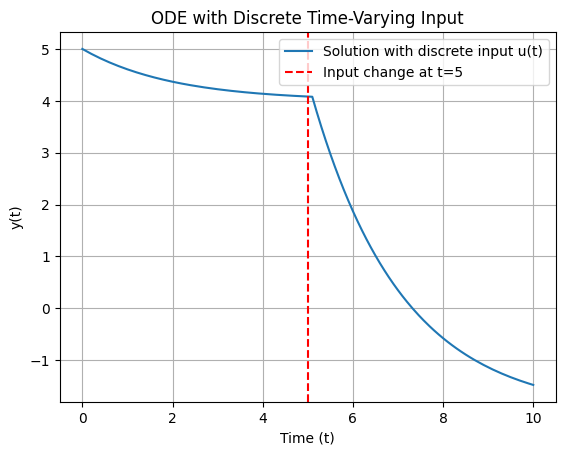

In [13]:
# Define the ODE with a discrete time-varying input u(t)
def ode_with_discrete_input(t, y, k, u_t):
    dydt = -k * y[0] + u_t  # ODE: dy/dt = -ky + u(t)
    return [dydt]

# Parameters
k = 0.5  # Decay constant
y0 = [5.0]  # Initial condition y(0) = 5
current_time = 0.0  # Start time
end_time = 10.0  # End time
time_step = 0.1  # Time step size for each solve_ivp call

# Arrays to store the results
t_values = []
y_values = []

# Set the initial input u(t)
u_t = 2  # Initial value of u(t)

# Simulate in a while loop with discrete input changes
while current_time < end_time:
    next_time = min(current_time + time_step, end_time)
    
    # Solve the ODE over the current time step
    solution = solve_ivp(ode_with_discrete_input, [current_time, next_time], y0, args=(k, u_t))
    
    # Update the results
    t_values.extend(solution.t)
    y_values.extend(solution.y[0])
    
    # Update the initial conditions for the next step
    y0 = [solution.y[0][-1]]  # The last value of y becomes the new initial condition
    current_time = next_time  # Move to the next time step
    
    # Change the input u(t) at t = 5
    if current_time >= 5.0:
        u_t = -1  # Change the value of u(t)

# Plot the solution
plt.figure()
plt.plot(t_values, y_values, label='Solution with discrete input u(t)')
plt.axvline(x=5, color='r', linestyle='--', label='Input change at t=5')
plt.title('ODE with Discrete Time-Varying Input')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.show()

#### Explanation:

1. **`ode_with_discrete_input`**:
   - Defines the ODE system with a discrete input `u(t)` that changes at specific time points. The input is passed as a parameter (`u_t`) and can change in the simulation loop.

2. **Simulation in a While Loop**:
   - We solve the ODE using `solve_ivp` over fixed time steps (`time_step = 1.0`).
   - At each iteration, we check if the time has reached a point where the input `u(t)` should change (in this case, when `t >= 5.0`).

3. **Updating the Input**:
   - Initially, `u(t) = 2`, and after `t = 5`, we change `u(t)` to `-1`.

4. **Plotting**:
   - The results are plotted, showing the evolution of `y(t)` over time, with a vertical line at `t = 5` indicating the point where the input changes.